In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [9]:

df = pd.read_csv(r"C:\Users\yashv\Downloads\USA.csv")
df.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2020-08-01,2020-10-31,90,neighborhood,1,697920,f,"Navarre Beach, FL - Pensacola Beach",Navarre Beach,Florida,FL,Condo/Co-op,3,467500.0,-0.060302,-0.063595,614500.0,0.197973,0.293820,373.433708,-0.004054,0.004796,397.826787,-0.002914,0.023708,64.0,-0.058824,0.230769,10.0,-0.285714,1.0,34.0,-0.260870,-0.260870,52.0,-0.16129,-0.315789,NaN,NaN,NaN,87.0,-8.0,-59.0,0.971137,-0.002932,0.002941,0.078125,0.004596,0.058894,NaN,NaN,NaN,0.1,0.100000,0.1000,"Pensacola, FL",37860,2022-01-09 14:29:56
1,2020-09-01,2020-11-30,90,neighborhood,1,418921,f,"Bayonet Point, FL - Forest Acres",Bayonet Point,Florida,FL,Single Family Residential,6,480000.0,0.509434,NaN,499900.0,0.000000,NaN,167.890871,0.202690,NaN,159.661450,0.000000,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,1.0,0.00000,NaN,NaN,NaN,NaN,88.0,82.0,NaN,1.000000,-0.009524,NaN,0.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tampa, FL",45300,2022-01-09 14:29:56
2,2014-02-01,2014-04-30,90,neighborhood,1,101384,f,"Scottsdale, AZ - Troon North",Scottsdale,Arizona,AZ,All Residential,-1,543562.0,-0.116159,0.111579,510000.0,-0.036736,-0.201253,200.764818,-0.035299,0.037204,220.807969,0.030466,0.006637,31.0,0.240000,-0.205128,8.0,-0.384615,-0.5,45.0,-0.318182,-0.400000,91.0,-0.09000,0.300000,NaN,NaN,NaN,138.0,-16.0,40.5,0.968795,0.006151,0.004524,0.193548,0.113548,0.142266,NaN,NaN,NaN,0.0,-0.230769,-0.3125,"Phoenix, AZ",38060,2022-01-09 14:29:56
3,2019-12-01,2020-02-29,90,neighborhood,1,104226,f,"Phoenix, AZ - Bellair",Phoenix,Arizona,AZ,Townhouse,13,185000.0,0.013699,0.105468,185000.0,-0.038709,0.019284,140.127389,0.010043,0.011204,147.213376,0.015732,0.018733,7.0,0.000000,0.750000,2.0,-0.333333,0.0,7.0,0.166667,0.166667,2.0,0.00000,-0.333333,NaN,NaN,NaN,42.0,0.0,10.0,0.959808,0.001736,-0.047408,0.285714,0.000000,-0.464286,NaN,NaN,NaN,0.5,0.500000,0.0000,"Phoenix, AZ",38060,2022-01-09 14:29:56
4,2016-08-01,2016-10-31,90,neighborhood,1,549865,f,"Rochester, MN - Cimarron",Rochester,Minnesota,MN,Multi-Family (2-4 Unit),4,180000.0,0.000000,NaN,NaN,NaN,NaN,89.108911,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,0.0,NaN,0.947368,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rochester, MN",40340,2022-01-09 14:29:56


In [10]:
df.shape

(2000000, 58)

In [11]:
(df.isnull().sum()/len(df))*100

period_begin                        0.00000
period_end                          0.00000
period_duration                     0.00000
region_type                         0.00000
region_type_id                      0.00000
table_id                            0.00000
is_seasonally_adjusted              0.00000
region                              0.00000
city                                0.00000
state                               0.00000
state_code                          0.00000
property_type                       0.00000
property_type_id                    0.00000
median_sale_price                   0.27630
median_sale_price_mom               5.99990
median_sale_price_yoy              15.29275
median_list_price                   8.73885
median_list_price_mom              14.89470
median_list_price_yoy              22.28455
median_ppsf                         0.91840
median_ppsf_mom                     6.62340
median_ppsf_yoy                    15.86050
median_list_ppsf                

In [12]:
threshold = len(df) * 0.7  # Keep only the columns with at least 60% non-NA values
df = df.dropna(thresh=threshold, axis=1)

In [13]:
df.dtypes

period_begin                       object
period_end                         object
period_duration                     int64
region_type                        object
region_type_id                      int64
table_id                            int64
is_seasonally_adjusted             object
region                             object
city                               object
state                              object
state_code                         object
property_type                      object
property_type_id                    int64
median_sale_price                 float64
median_sale_price_mom             float64
median_sale_price_yoy             float64
median_list_price                 float64
median_list_price_mom             float64
median_list_price_yoy             float64
median_ppsf                       float64
median_ppsf_mom                   float64
median_ppsf_yoy                   float64
median_list_ppsf                  float64
median_list_ppsf_mom              

In [14]:
(df.isnull().sum()/len(df))*100

period_begin                       0.00000
period_end                         0.00000
period_duration                    0.00000
region_type                        0.00000
region_type_id                     0.00000
table_id                           0.00000
is_seasonally_adjusted             0.00000
region                             0.00000
city                               0.00000
state                              0.00000
state_code                         0.00000
property_type                      0.00000
property_type_id                   0.00000
median_sale_price                  0.27630
median_sale_price_mom              5.99990
median_sale_price_yoy             15.29275
median_list_price                  8.73885
median_list_price_mom             14.89470
median_list_price_yoy             22.28455
median_ppsf                        0.91840
median_ppsf_mom                    6.62340
median_ppsf_yoy                   15.86050
median_list_ppsf                   9.11045
median_list

# Changing the datatypes as they can be represented in datetime with accurately  and will be helpful in the analysis 

In [15]:
# Iterate through each column and print unique values with count
for column in df.columns:
    unique_values_count = df[colaumn].value_counts()
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\nCount:\n{unique_values_count}\n")


Unique values in 'period_begin':
['2020-08-01' '2020-09-01' '2014-02-01' '2019-12-01' '2016-08-01'
 '2017-12-01' '2021-01-01' '2017-02-01' '2017-11-01' '2014-05-01'
 '2015-01-01' '2019-10-01' '2019-01-01' '2012-05-01' '2021-04-01'
 '2018-11-01' '2019-02-01' '2013-11-01' '2018-01-01' '2015-06-01'
 '2019-05-01' '2017-05-01' '2020-10-01' '2012-02-01' '2018-02-01'
 '2017-04-01' '2014-09-01' '2016-01-01' '2019-06-01' '2015-07-01'
 '2018-03-01' '2015-04-01' '2016-09-01' '2014-04-01' '2018-12-01'
 '2012-11-01' '2019-11-01' '2021-03-01' '2016-10-01' '2017-08-01'
 '2020-06-01' '2016-11-01' '2013-06-01' '2019-04-01' '2012-10-01'
 '2013-02-01' '2014-08-01' '2015-11-01' '2013-07-01' '2017-09-01'
 '2021-08-01' '2012-01-01' '2020-02-01' '2016-03-01' '2014-01-01'
 '2016-12-01' '2021-05-01' '2014-12-01' '2015-05-01' '2018-04-01'
 '2021-02-01' '2017-06-01' '2016-06-01' '2018-05-01' '2020-11-01'
 '2012-03-01' '2021-06-01' '2012-09-01' '2020-05-01' '2013-03-01'
 '2012-08-01' '2015-12-01' '2015-09-01' '20

Unique values in 'property_type':
['Condo/Co-op' 'Single Family Residential' 'All Residential' 'Townhouse'
 'Multi-Family (2-4 Unit)']
Count:
All Residential              751312
Single Family Residential    683719
Condo/Co-op                  234449
Townhouse                    181519
Multi-Family (2-4 Unit)      149001
Name: property_type, dtype: int64

Unique values in 'property_type_id':
[ 3  6 -1 13  4]
Count:
-1     751312
 6     683719
 3     234449
 13    181519
 4     149001
Name: property_type_id, dtype: int64

Unique values in 'median_sale_price':
[ 467500.   480000.   543562.  ... 1550250.  2082875.   233602.5]
Count:
250000.0     8190
225000.0     7675
150000.0     7516
175000.0     7383
200000.0     7304
             ... 
217780.0        1
1492300.0       1
465144.5        1
520662.5        1
233602.5        1
Name: median_sale_price, Length: 106127, dtype: int64

Unique values in 'median_sale_price_mom':
[-0.06030151  0.50943396 -0.11615935 ...  0.0166576  -0.17344173
 -0

Unique values in 'median_dom_mom':
[   -8.    82.   -16. ...  1119. -1087.  1285.]
Count:
 0.0       433400
 1.0        38049
-1.0        35437
 2.0        29902
 0.5        27898
            ...  
 1966.5         1
 8642.0         1
-1541.5         1
 736.5          1
 1285.0         1
Name: median_dom_mom, Length: 6688, dtype: int64

Unique values in 'median_dom_yoy':
[  -59.      nan    40.5 ... -1646.   1334.   1215. ]
Count:
 0.0       19969
-1.0       19316
 1.0       18427
-2.0       17414
-3.0       16564
           ...  
 3961.0        1
 1585.0        1
 2036.5        1
-2451.5        1
 1215.0        1
Name: median_dom_yoy, Length: 9221, dtype: int64

Unique values in 'avg_sale_to_list':
[0.97113693 1.         0.96879511 ... 0.98381059 0.99802903 0.93065315]
Count:
1.000000    75697
0.952381     1227
0.933333     1154
0.960000     1126
0.909091     1126
            ...  
1.136381        1
0.986781        1
0.986864        1
0.986444        1
0.930653        1
Name: avg_sale_

Unique values in 'last_updated':
['2022-01-09 14:29:56']
Count:
2022-01-09 14:29:56    2000000
Name: last_updated, dtype: int64



# Removing Coluumns from my Dataframe as they are of no use 

In [16]:

df = df.drop(columns=['period_duration','table_id', 'region_type', 'region_type_id','is_seasonally_adjusted', 'state_code', 'property_type_id','last_updated'])
df.head()

,period_begin,period_end,region,city,state,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,parent_metro_region,parent_metro_region_metro_code
0,2020-08-01,2020-10-31,"Navarre Beach, FL - Pensacola Beach",Navarre Beach,Florida,Condo/Co-op,467500.0,-0.060302,-0.063595,614500.0,0.197973,0.293820,373.433708,-0.004054,0.004796,397.826787,-0.002914,0.023708,64.0,-0.058824,0.230769,34.0,-0.260870,-0.260870,52.0,-0.16129,87.0,-8.0,-59.0,0.971137,-0.002932,0.002941,0.078125,0.004596,0.058894,"Pensacola, FL",37860
1,2020-09-01,2020-11-30,"Bayonet Point, FL - Forest Acres",Bayonet Point,Florida,Single Family Residential,480000.0,0.509434,NaN,499900.0,0.000000,NaN,167.890871,0.202690,NaN,159.661450,0.000000,NaN,1.0,0.000000,NaN,1.0,0.000000,NaN,1.0,0.00000,88.0,82.0,NaN,1.000000,-0.009524,NaN,0.000000,-1.000000,NaN,"Tampa, FL",45300
2,2014-02-01,2014-04-30,"Scottsdale, AZ - Troon North",Scottsdale,Arizona,All Residential,543562.0,-0.116159,0.111579,510000.0,-0.036736,-0.201253,200.764818,-0.035299,0.037204,220.807969,0.030466,0.006637,31.0,0.240000,-0.205128,45.0,-0.318182,-0.400000,91.0,-0.09000,138.0,-16.0,40.5,0.968795,0.006151,0.004524,0.193548,0.113548,0.142266,"Phoenix, AZ",38060
3,2019-12-01,2020-02-29,"Phoenix, AZ - Bellair",Phoenix,Arizona,Townhouse,185000.0,0.013699,0.105468,185000.0,-0.038709,0.019284,140.127389,0.010043,0.011204,147.213376,0.015732,0.018733,7.0,0.000000,0.750000,7.0,0.166667,0.166667,2.0,0.00000,42.0,0.0,10.0,0.959808,0.001736,-0.047408,0.285714,0.000000,-0.464286,"Phoenix, AZ",38060
4,2016-08-01,2016-10-31,"Rochester, MN - Cimarron",Rochester,Minnesota,Multi-Family (2-4 Unit),180000.0,0.000000,NaN,NaN,NaN,NaN,89.108911,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,88.0,0.0,NaN,0.947368,0.000000,NaN,0.000000,0.000000,NaN,"Rochester, MN",40340


In [17]:
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       median_sale_price  median_sale_price_mom  median_sale_price_yoy  \
count       1.994474e+06           1.880002e+06           1.694145e+06   
mean        3.839183e+05           1.408370e-01           9.043322e-01   
std         5.227227e+05           6.867992e+01           2.350421e+02   
min         1.000000e+00          -9.999773e-01          -9.999835e-01   
25%         1.470000e+05          -2.892562e-02          -4.000000e-02   
50%         2.572000e+05           0.000000e+00           8.578431e-02   
75%         4.437500e+05           4.634831e-02           2.440726e-01   
max         7.500000e+07           8.254900e+04           1.709990e+05   

       median_list_price  median_list_price_mom  median_list_price_yoy  \
count       1.825223e+06           1.702106e+06           1.554309e+06   
mean        4.046848e+05           3.674320e-02           1.689261e-01   
std         5.921025e+05           1.634248e+00           5.624883e+00   
min         1.000

In [18]:
!pip install pandas seaborn matplotlib


# To replace the null values with median

In [19]:
from sklearn.impute import SimpleImputer

# List of columns with missing values
columns_with_missing_values = [
    'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy',
    'median_list_price', 'median_list_price_mom', 'median_list_price_yoy',
    'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy',
    'median_list_ppsf', 'median_list_ppsf_mom', 'median_list_ppsf_yoy',
    'homes_sold', 'homes_sold_mom', 'homes_sold_yoy',
    'new_listings', 'new_listings_mom', 'new_listings_yoy',
    'inventory', 'inventory_mom',
    'median_dom', 'median_dom_mom', 'median_dom_yoy',
    'avg_sale_to_list', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy',
    'sold_above_list', 'sold_above_list_mom', 'sold_above_list_yoy'
]

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])


In [20]:
(df.isnull().sum()/len(df))*100

period_begin                      0.0
period_end                        0.0
region                            0.0
city                              0.0
state                             0.0
property_type                     0.0
median_sale_price                 0.0
median_sale_price_mom             0.0
median_sale_price_yoy             0.0
median_list_price                 0.0
median_list_price_mom             0.0
median_list_price_yoy             0.0
median_ppsf                       0.0
median_ppsf_mom                   0.0
median_ppsf_yoy                   0.0
median_list_ppsf                  0.0
median_list_ppsf_mom              0.0
median_list_ppsf_yoy              0.0
homes_sold                        0.0
homes_sold_mom                    0.0
homes_sold_yoy                    0.0
new_listings                      0.0
new_listings_mom                  0.0
new_listings_yoy                  0.0
inventory                         0.0
inventory_mom                     0.0
median_dom  

# Code to remove the outliers if i want to 

In [21]:
# # Specify the column for which you want to remove outliers
# specific_column = 'median_sale_price'

# # Calculate quartiles and IQR for the specific column
# Q1_specific = df[specific_column].quantile(0.25)
# Q3_specific = df[specific_column].quantile(0.75)
# IQR_specific = Q3_specific - Q1_specific

# # Remove outliers for the specific column
# df_no_outliers_specific = df[(df[specific_column] >= (Q1_specific - 1.5 * IQR_specific)) & (df[specific_column] <= (Q3_specific + 1.5 * IQR_specific))]

# # Display summary statistics after removing outliers for the specific column
# summary_stats_no_outliers_specific = df_no_outliers_specific.describe()
# print("Summary Statistics after Removing Outliers for", specific_column)
# print(summary_stats_no_outliers_specific)


<Figure size 1600x1200 with 0 Axes>

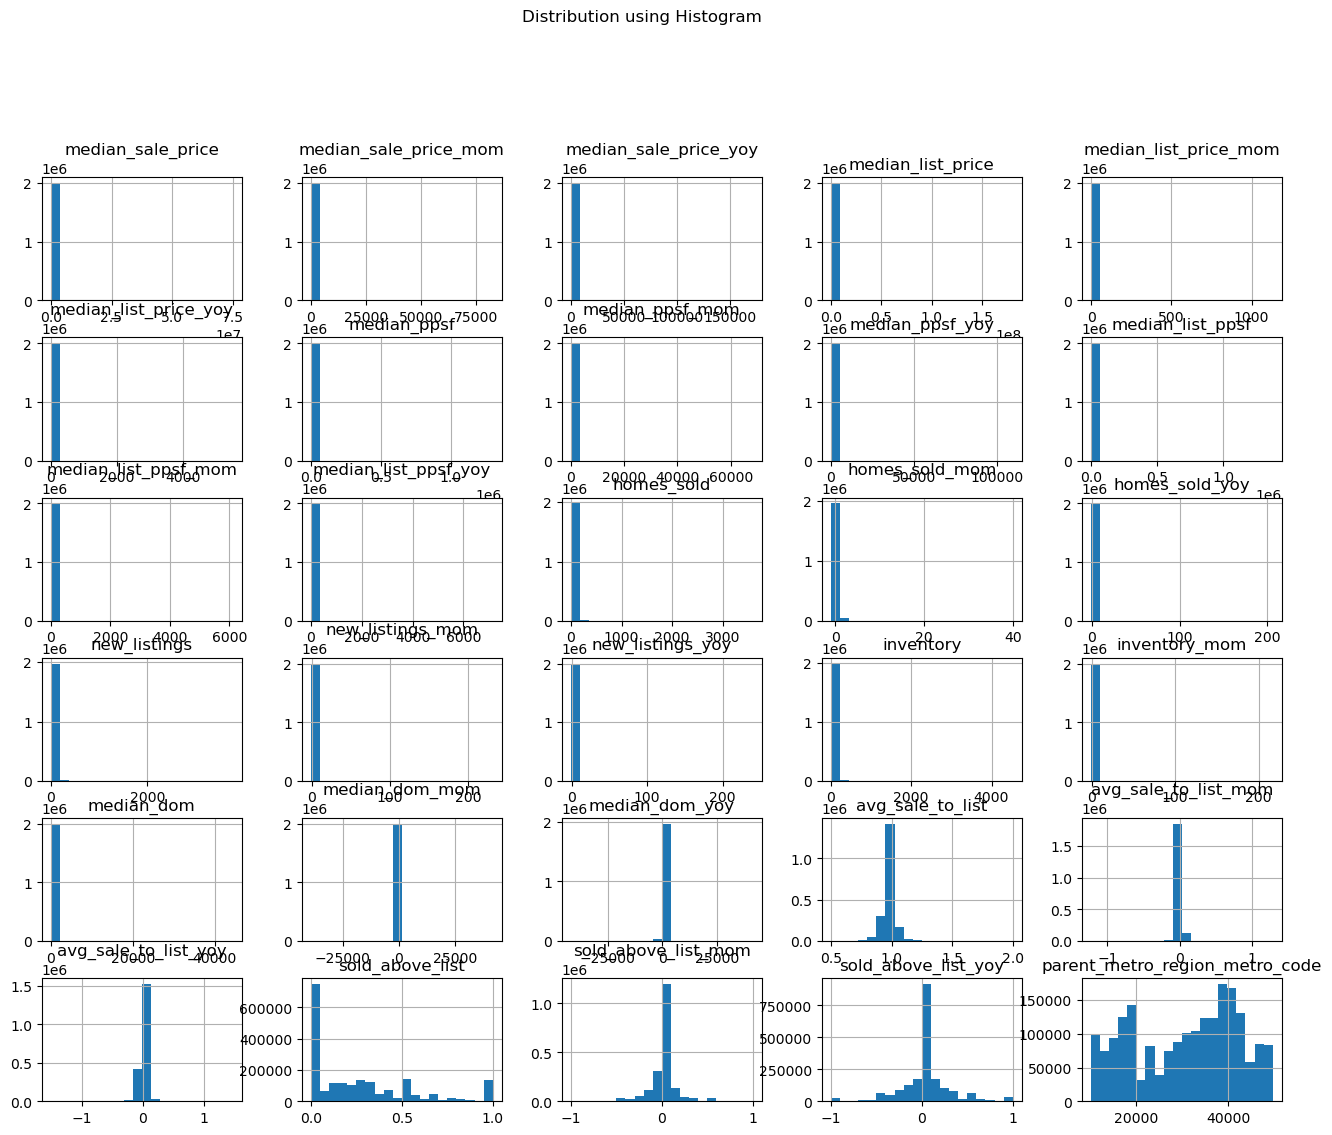

In [22]:
# Distribution using Histogram
plt.figure(figsize=(16, 12))
df.hist(bins=20, figsize=(16, 12))
plt.suptitle("Distribution using Histogram", y=1.02)
plt.show()

In [23]:
# # Univariate Analysis
# for column in df.columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(df[column], kde=True)
#     plt.title(f"Univariate Analysis - {column}")
#     plt.show()

In [24]:
# # Bivariate Analysis (scatter plots for numerical columns)
# numerical_columns = df.select_dtypes(include=['float64']).columns
# for column in numerical_columns:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=column, y='median_sale_price', data=df)
#     plt.title(f"Bivariate Analysis - {column} vs Median Sale Price")
#     plt.show()

In [25]:
# # Mutual Information
# mi_scores = {}
# for column in df.columns:
#     mi_scores[column] = mutual_info_regression(df.drop(column, axis=1), df[column])

# mi_df = pd.DataFrame(list(mi_scores.items()), columns=['Feature', 'Mutual Information'])
# mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# # Bar Plot for Mutual Information
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
# plt.title("Mutual Information Scores")
# plt.show()



In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Loop over each column in the DataFrame
for col in df.columns:
    # Check if the column data type is object
    if df[col].dtype == 'object':
        # Use label encoder to transform the column
        df[col] = le.fit_transform(df[col])

In [27]:
df.head(10)a

,period_begin,period_end,region,city,state,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,parent_metro_region,parent_metro_region_metro_code
0,103,103,20737,1716,9,1,467500.0,-0.060302,-0.063595,614500.0,0.197973,0.293820,373.433708,-0.004054,0.004796,397.826787,-0.002914,0.023708,64.0,-0.058824,0.230769,34.0,-0.260870,-0.260870,52.0,-0.161290,87.0,-8.0,-59.0,0.971137,-0.002932,0.002941,0.078125,0.004596,0.058894,218,37860
1,104,104,2426,152,9,3,480000.0,0.509434,0.085784,499900.0,0.000000,0.076688,167.890871,0.202690,0.080489,159.661450,0.000000,0.072561,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,88.0,82.0,-4.0,1.000000,-0.009524,0.004355,0.000000,-1.000000,0.000000,292,45300
2,25,25,29586,2296,2,0,543562.0,-0.116159,0.111579,510000.0,-0.036736,-0.201253,200.764818,-0.035299,0.037204,220.807969,0.030466,0.006637,31.0,0.240000,-0.205128,45.0,-0.318182,-0.400000,91.0,-0.090000,138.0,-16.0,40.5,0.968795,0.006151,0.004524,0.193548,0.113548,0.142266,220,38060
3,95,95,24829,2014,2,4,185000.0,0.013699,0.105468,185000.0,-0.038709,0.019284,140.127389,0.010043,0.011204,147.213376,0.015732,0.018733,7.0,0.000000,0.750000,7.0,0.166667,0.166667,2.0,0.000000,42.0,0.0,10.0,0.959808,0.001736,-0.047408,0.285714,0.000000,-0.464286,220,38060
4,55,55,26813,2167,23,2,180000.0,0.000000,0.085784,270470.0,0.000000,0.076688,89.108911,0.000000,0.080489,153.126329,0.000000,0.072561,1.0,0.000000,0.000000,7.0,0.000000,0.000000,6.0,0.000000,88.0,0.0,-4.0,0.947368,0.000000,0.004355,0.000000,0.000000,0.000000,241,40340
5,71,71,32572,2603,2,0,155000.0,0.013072,0.107143,157500.0,0.036184,0.050350,106.125696,-0.009707,0.117478,94.506454,-0.003984,-0.083343,15.0,0.000000,-0.166667,16.0,-0.157895,-0.111111,19.0,-0.136364,43.0,-1.0,-23.5,0.983203,-0.019262,0.022076,0.266667,-0.066667,-0.011111,299,46060
6,108,108,31475,2533,4,3,1135000.0,0.227027,0.046083,997000.0,0.113966,-0.500251,759.035363,0.000000,1.274308,932.599266,0.282476,0.601079,2.0,-0.500000,1.000000,3.0,0.000000,2.000000,2.0,0.000000,6.0,-37.5,-227.0,1.201285,0.124723,0.423508,1.000000,0.500000,1.000000,257,42034
7,61,61,13291,1129,11,0,370000.0,0.006803,0.032078,359000.0,-0.038822,-0.019126,555.192476,-0.002561,0.024809,532.028470,-0.039664,-0.012598,100.0,0.020408,0.111111,117.0,-0.100000,-0.085938,119.0,0.017094,69.0,-1.0,9.0,0.971104,0.000171,-0.009469,0.190000,0.016531,-0.032222,304,46520
8,70,70,31990,2576,13,3,212500.0,0.172414,0.344937,235000.0,0.237493,0.672003,137.096774,0.024014,0.006272,196.488294,0.022277,1.159217,5.0,0.250000,-0.444444,1.0,0.000000,-0.500000,1.0,-0.500000,79.0,3.5,-36.0,0.987139,-0.008793,0.026782,0.400000,-0.100000,0.288889,54,16984
9,28,28,25270,2049,29,0,410000.0,-0.020311,0.018634,474450.0,0.000949,-0.215136,375.000000,0.179487,0.544279,274.186734,-0.404948,-0.247768,5.0,-0.166667,0.250000,4.0,0.000000,0.000000,6.0,0.200000,137.0,-5.0,-29.0,0.967092,-0.000863,0.048208,0.200000,-0.133333,0.200000,195,35154


In [28]:
df.corr()

,period_begin,period_end,region,city,state,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,parent_metro_region,parent_metro_region_metro_code
period_begin,1.000000,1.000000,0.003806,0.004191,0.031797,0.005193,0.140338,-1.443594e-03,-2.786190e-03,0.114515,-0.002138,-0.000440,0.020312,-1.411745e-03,-2.690295e-03,0.017639,0.000359,0.000429,0.013908,-0.007338,0.009360,0.006786,-0.011122,0.012351,-0.028427,0.011965,-0.102702,0.001652,0.004512,0.149585,-0.000370,0.020242,0.159514,0.005438,0.065789,0.000748,0.000567
period_end,1.000000,1.000000,0.003806,0.004191,0.031797,0.005193,0.140338,-1.443594e-03,-2.786190e-03,0.114515,-0.002138,-0.000440,0.020312,-1.411745e-03,-2.690295e-03,0.017639,0.000359,0.000429,0.013908,-0.007338,0.009360,0.006786,-0.011122,0.012351,-0.028427,0.011965,-0.102702,0.001652,0.004512,0.149585,-0.000370,0.020242,0.159514,0.005438,0.065789,0.000748,0.000567
region,0.003806,0.003806,1.000000,0.998958,-0.026990,-0.001687,0.043688,-3.960967e-04,-1.256487e-03,0.035655,-0.001729,-0.001982,0.007567,-5.641878e-04,-2.120701e-03,0.007318,-0.000145,-0.000837,0.001970,-0.000163,-0.002435,-0.001735,-0.001126,-0.003505,-0.005778,0.001435,-0.004780,-0.000204,0.000115,0.023456,-0.000184,0.001376,0.038665,0.000166,0.000331,0.492318,0.494243
city,0.004191,0.004191,0.998958,1.000000,-0.025430,-0.001758,0.042186,-3.879419e-04,-1.228826e-03,0.034613,-0.001765,-0.002034,0.007328,-5.509238e-04,-2.114325e-03,0.007059,-0.000124,-0.000833,0.002287,-0.000192,-0.002424,-0.001361,-0.001105,-0.003598,-0.004656,0.001104,-0.003551,-0.000192,-0.000012,0.021009,-0.000144,0.001318,0.036005,0.000155,0.000106,0.492223,0.494516
state,0.031797,0.031797,-0.026990,-0.025430,1.000000,0.002707,-0.189512,9.035234e-04,-2.118408e-04,-0.166599,0.001676,-0.000664,-0.027307,9.448924e-04,4.995042e-04,-0.025016,-0.000488,-0.000534,0.004506,0.002061,0.006332,0.005776,0.003551,0.006141,0.013931,-0.004313,0.016898,0.000122,-0.004915,-0.077024,0.000709,0.005482,-0.072738,0.000302,0.007167,-0.014773,-0.012836
property_type,0.005193,0.005193,-0.001687,-0.001758,0.002707,1.000000,0.029138,-1.699654e-05,9.834912e-04,0.020159,-0.001267,0.000266,0.000053,1.761991e-04,1.576381e-03,-0.001694,-0.000082,0.000371,-0.058235,0.006897,0.000895,-0.058026,-0.000092,-0.000223,-0.058836,0.000578,0.001472,0.000112,0.000198,0.017888,0.000162,0.002555,0.020327,-0.000561,0.002147,-0.000781,-0.001004
median_sale_price,0.140338,0.140338,0.043688,0.042186,-0.189512,0.029138,1.000000,-7.738060e-04,-1.381878e-03,0.751755,-0.002768,0.000743,0.070438,-1.036375e-03,-1.950521e-03,0.061245,-0.000877,-0.001186,-0.008309,0.001154,0.000895,-0.007030,0.003930,-0.000832,-0.003697,0.006531,0.009922,0.002432,0.007571,0.128418,-0.001737,0.005742,0.090849,-0.002461,0.006105,0.074178,0.075546
median_sale_price_mom,-0.001444,-0.001444,-0.000396,-0.000388,0.000904,-0.000017,-0.000774,1.000000e+00,2.711264e-06,-0.000908,0.000053,0.000042,-0.000138,9.756400e-01,1.525100e-07,-0.000141,0.000019,0.000018,-0.000459,0.000942,-0.000458,-0.000428,0.000122,-0.000347,-0.000375,-0.000888,0.000891,0.001646,-0.000072,-0.001200,0.000322,-0.000322,-0.001044,0.000641,-0.000522,0.000006,-0.000056
median_sale_price_yoy,-0.002786,-0.002786,-0.001256,-0.001229,-0.000212,0.000983,-0.001382,2.711264e-06,1.000000e+00,-0.001356,0.000095,0.000508,-0.000210,-1.437193e-07,8.744241e-01,-0.000176,0.000117,0.000188,-0.000740,-0.000138,0.002885,-0.000667,-0.000146,0.001591,-0.000604,0.000589,0.000284,-0.000137,-0.000639,-0.001318,-0.000762,0.000142,-0.001455,-0.000589,0.000808,-0.001945

In [29]:
# For mutual information

In [30]:
# from sklearn.feature_selection import mutual_info_regression

# # Ensure your target variable 'price' is numeric
# df['median_sale_price'] = pd.to_numeric(df['median_sale_price'], errors='coerce')

# # Drop rows with missing values
# df= df.dropna()

# # Separate features and target variable
# X = df.drop('median_sale_price', axis=1)
# y = df['median_sale_price']

# # Compute mutual information
# mi = mutual_info_regression(X, y)

# # Create a DataFrame for easier visualization
# mi_df = pd.DataFrame(mi, index=X.columns, columns=['mutual_info']).sort_values(by='mutual_info', ascending=False)

# print(mi_df)

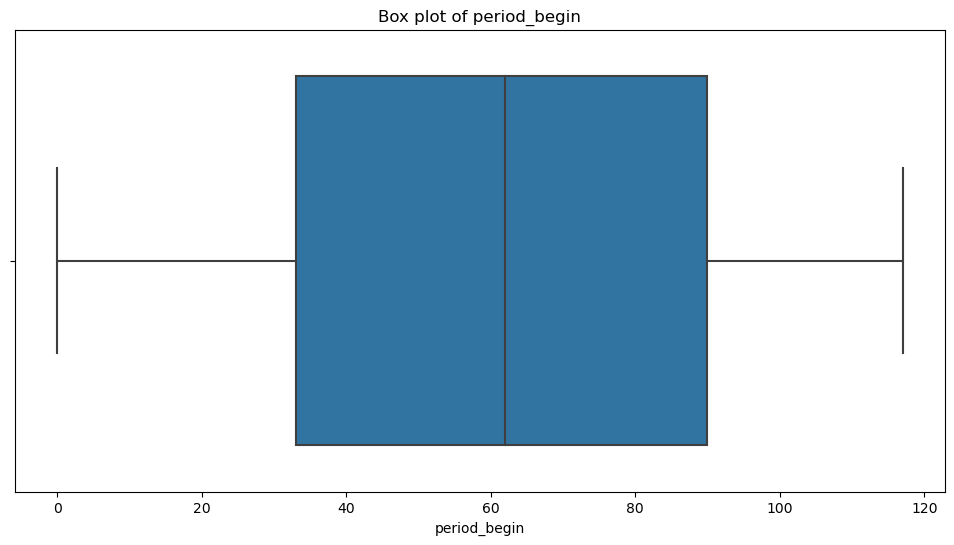

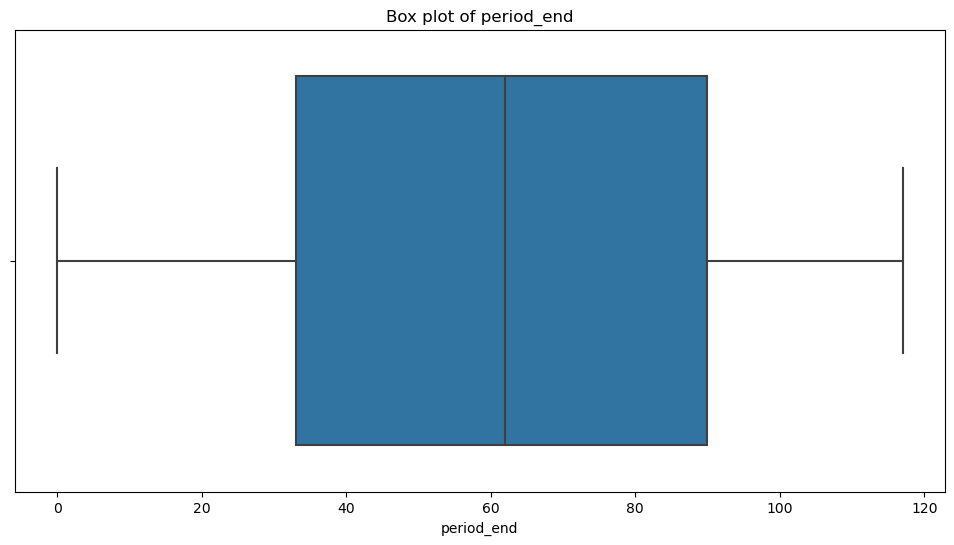

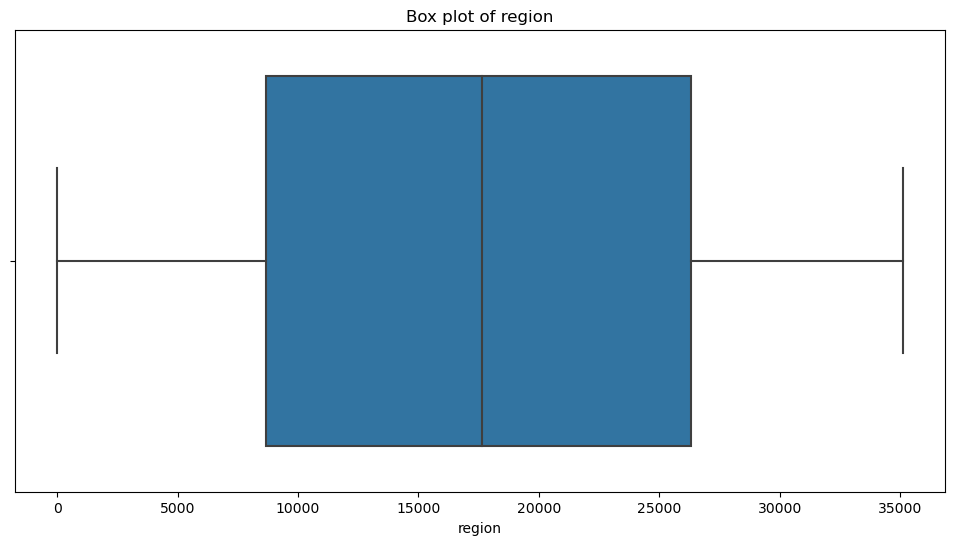

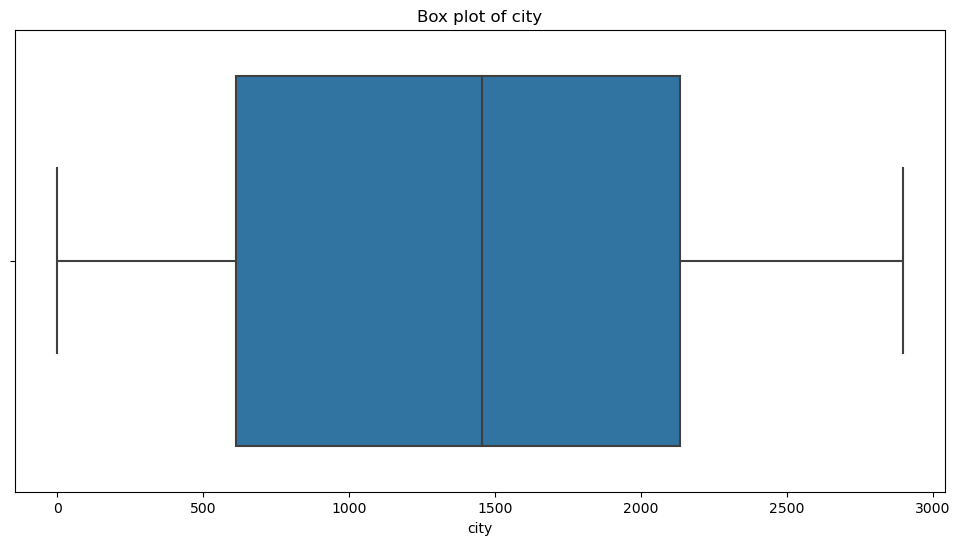

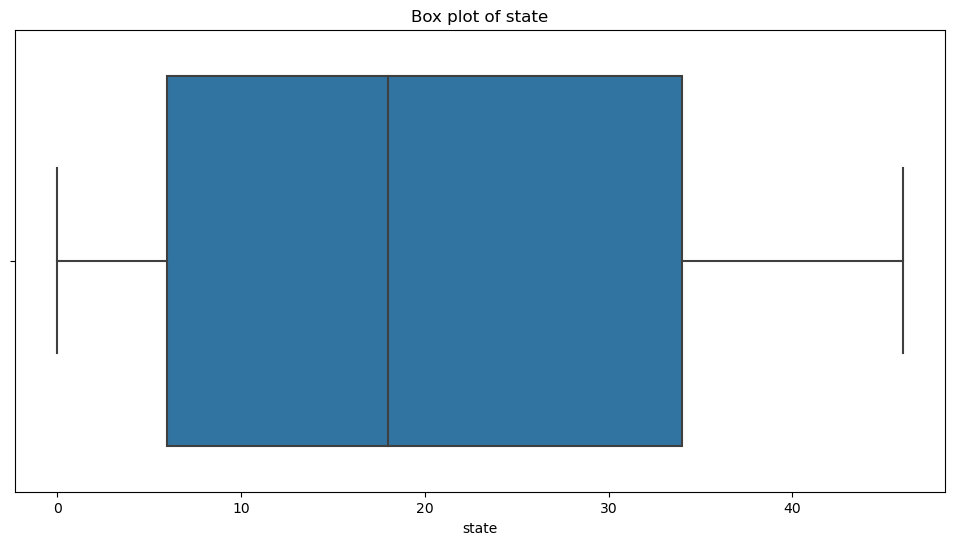

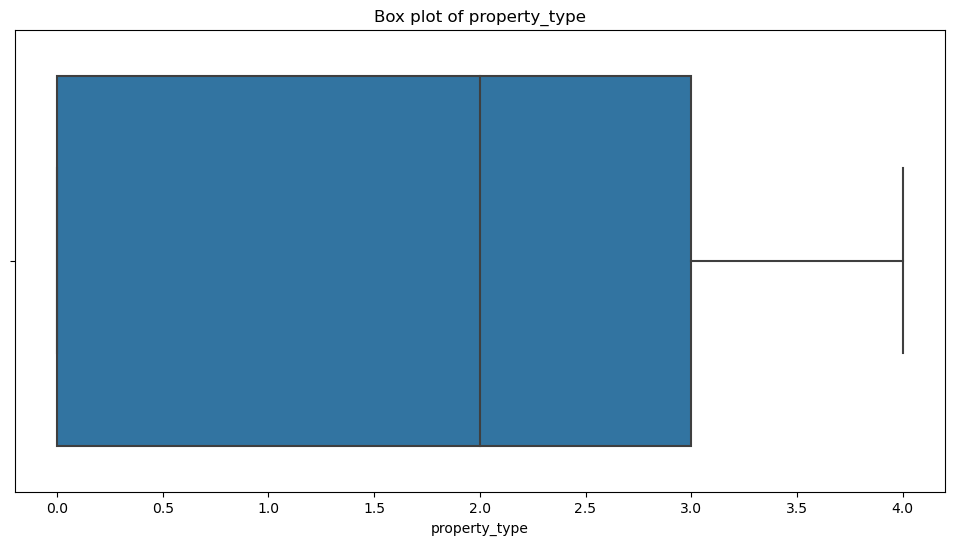

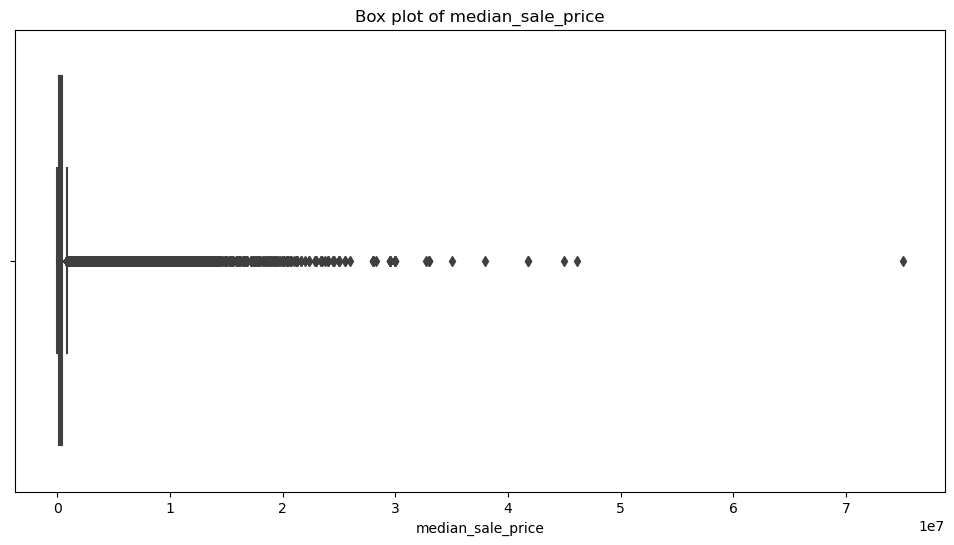

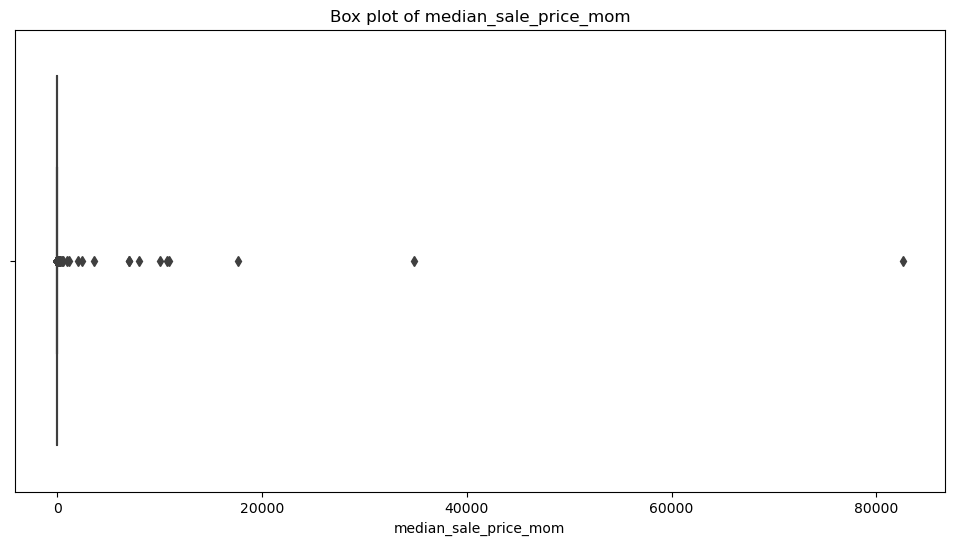

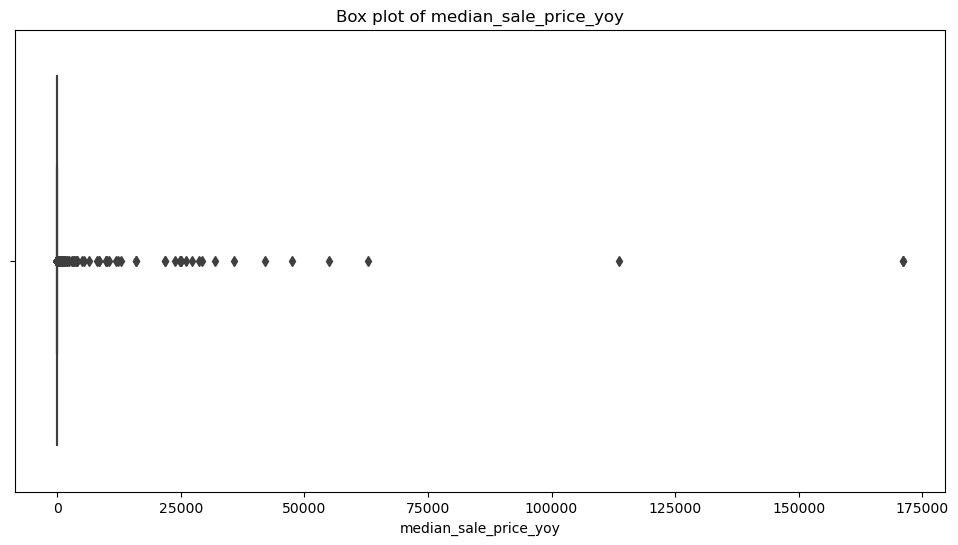

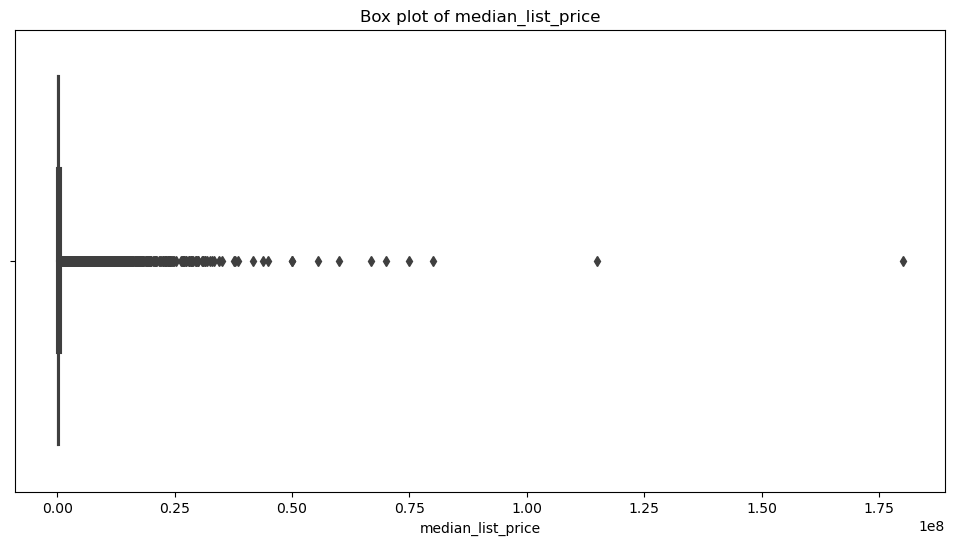

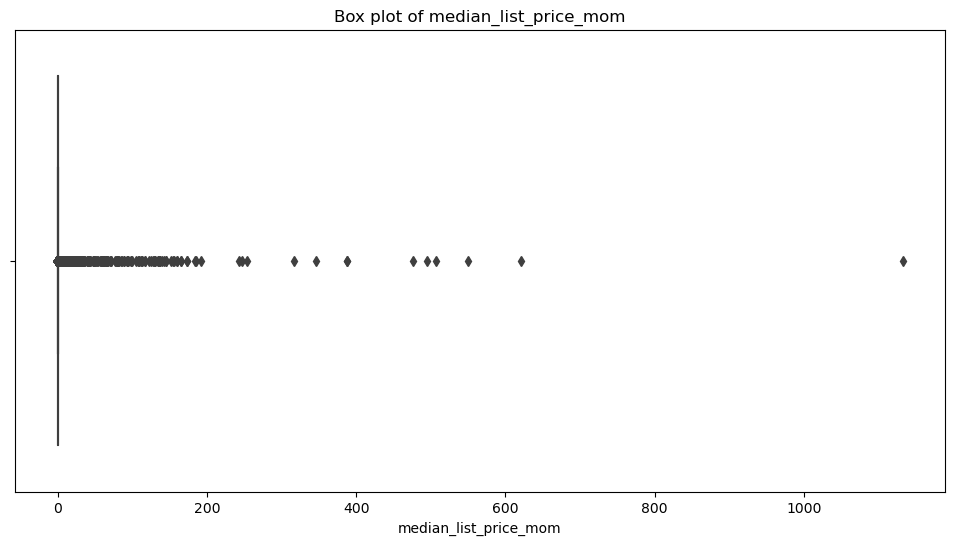

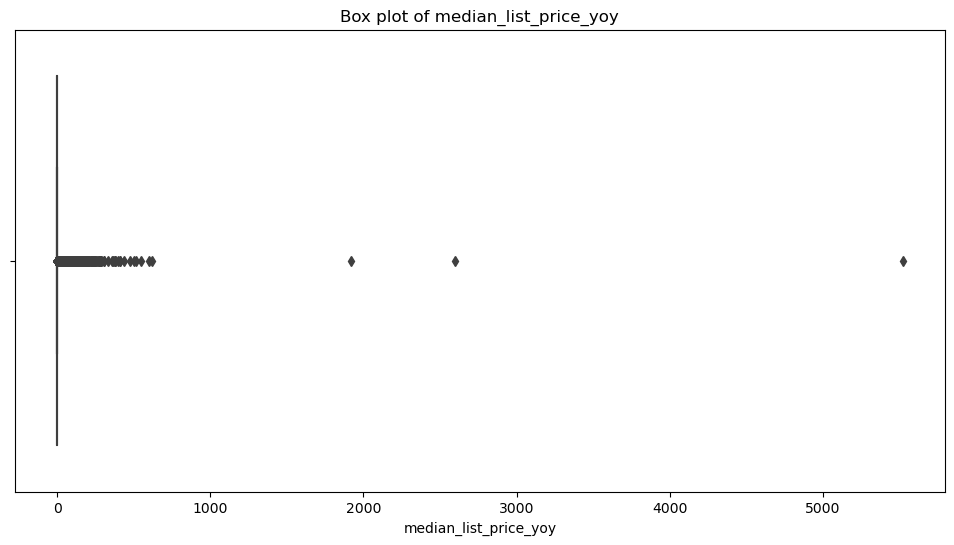

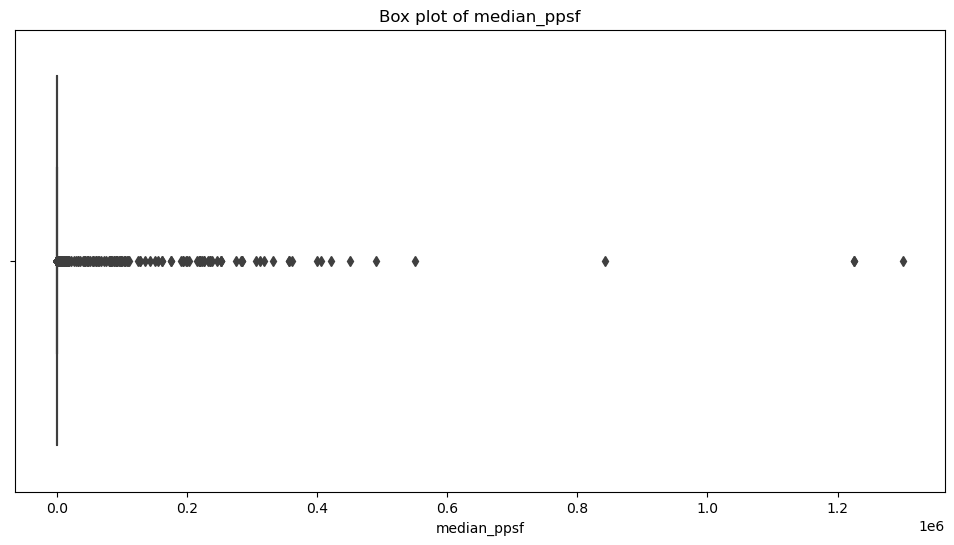

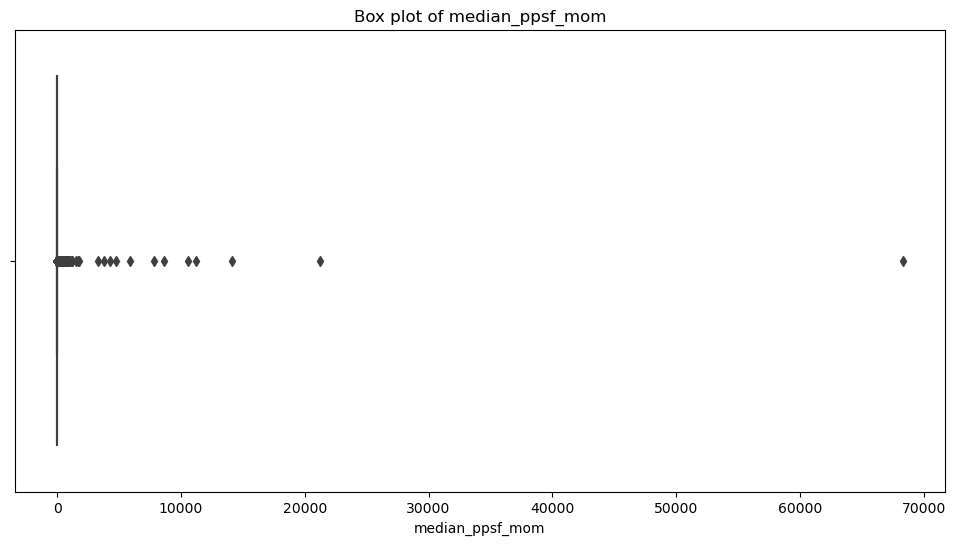

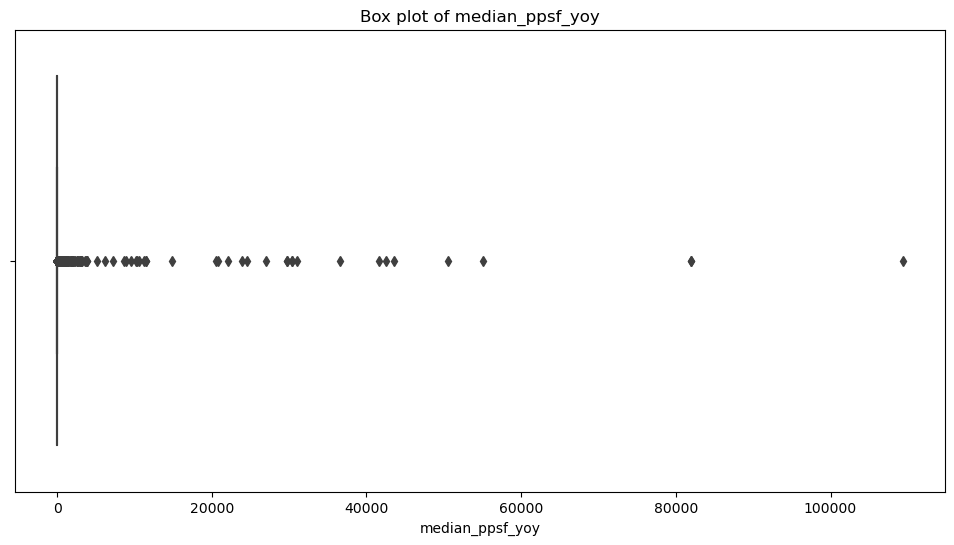

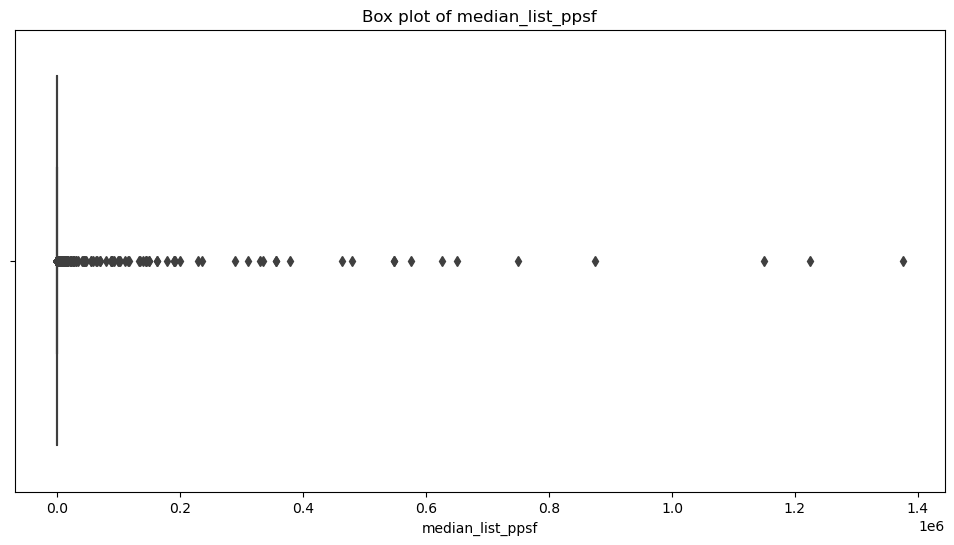

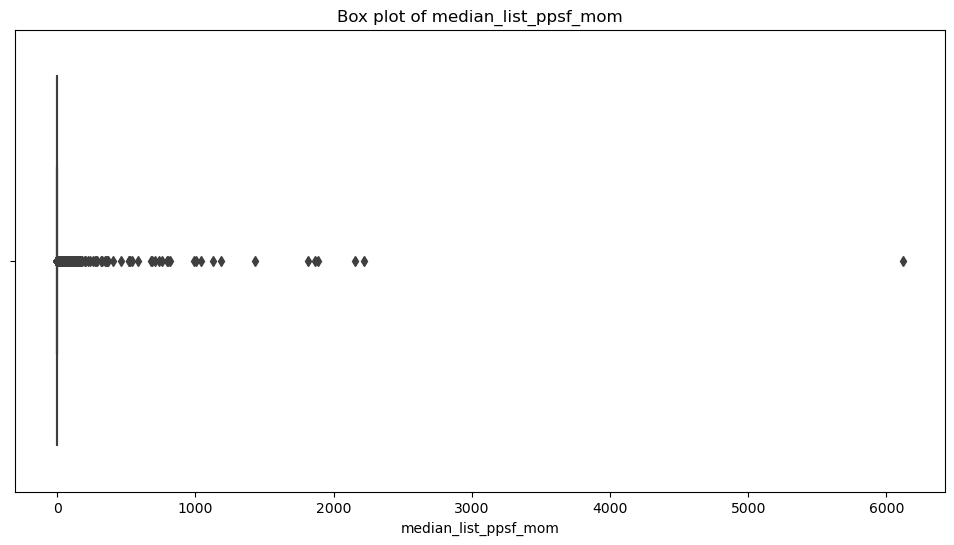

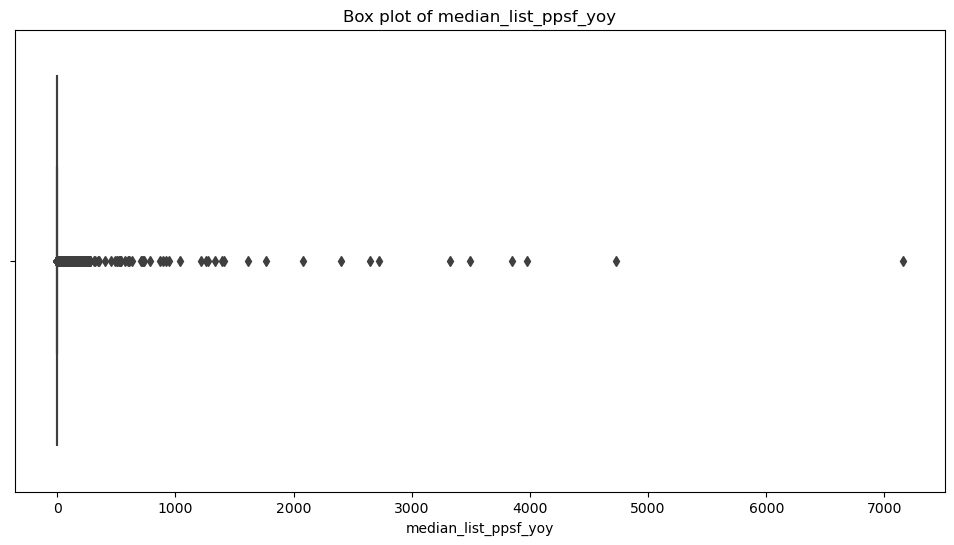

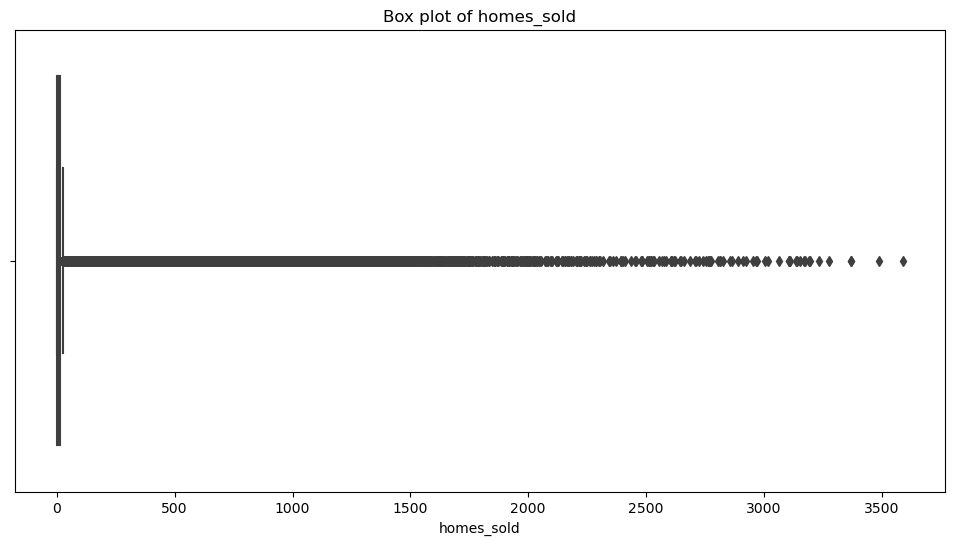

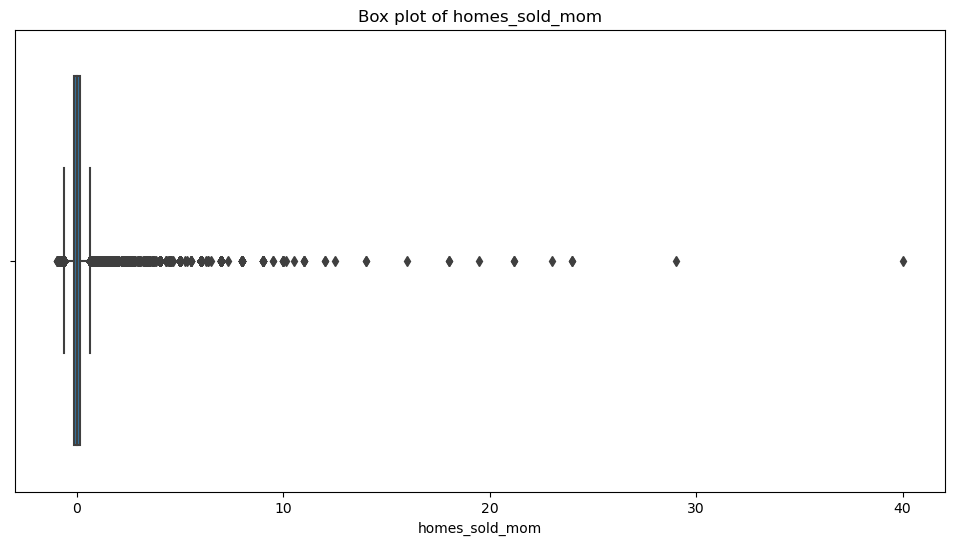

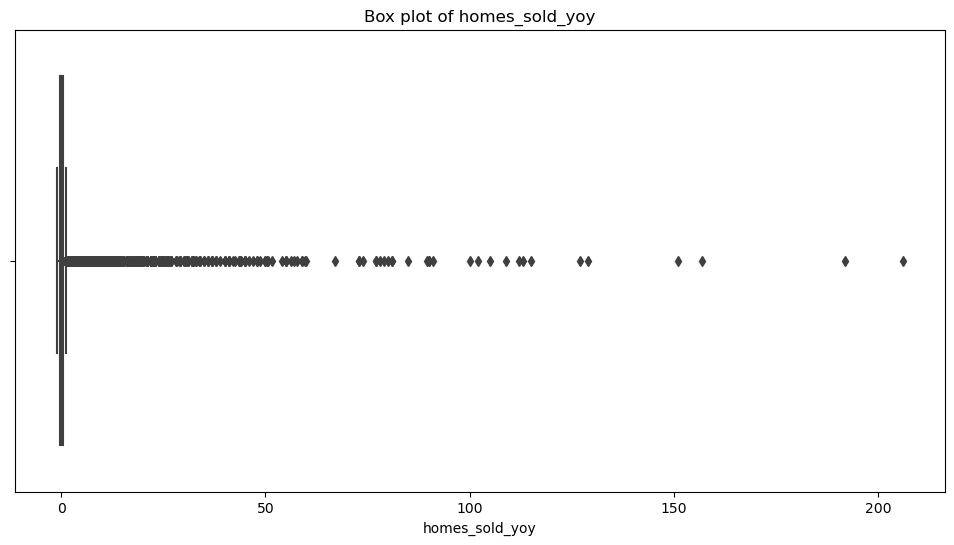

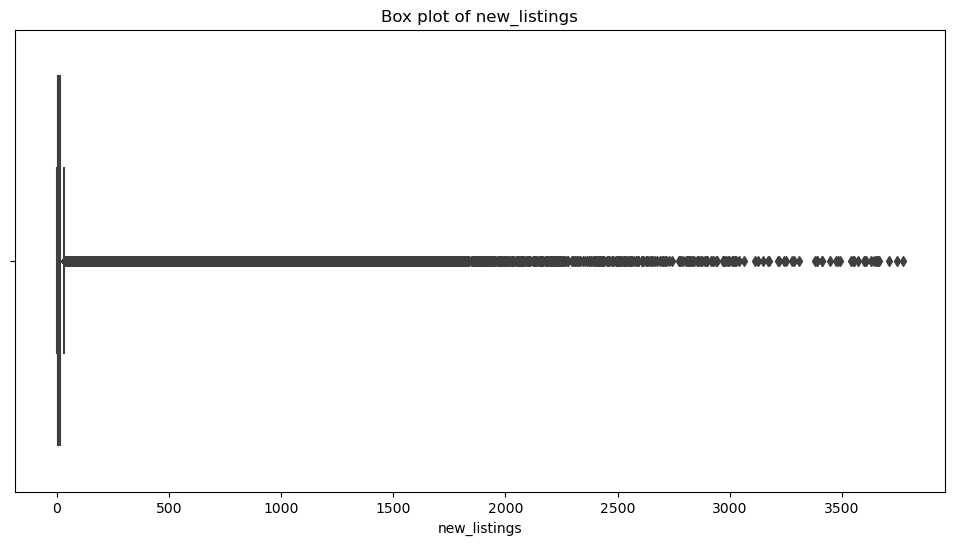

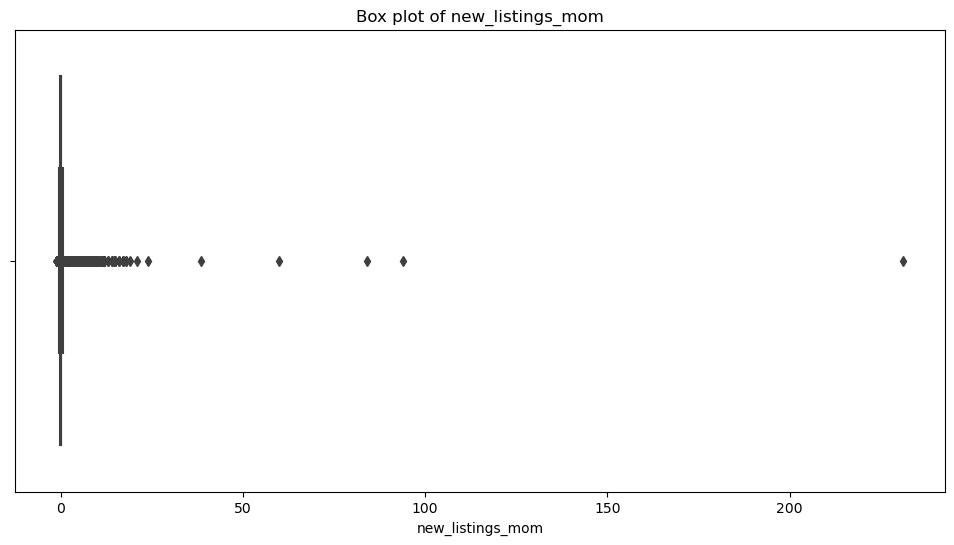

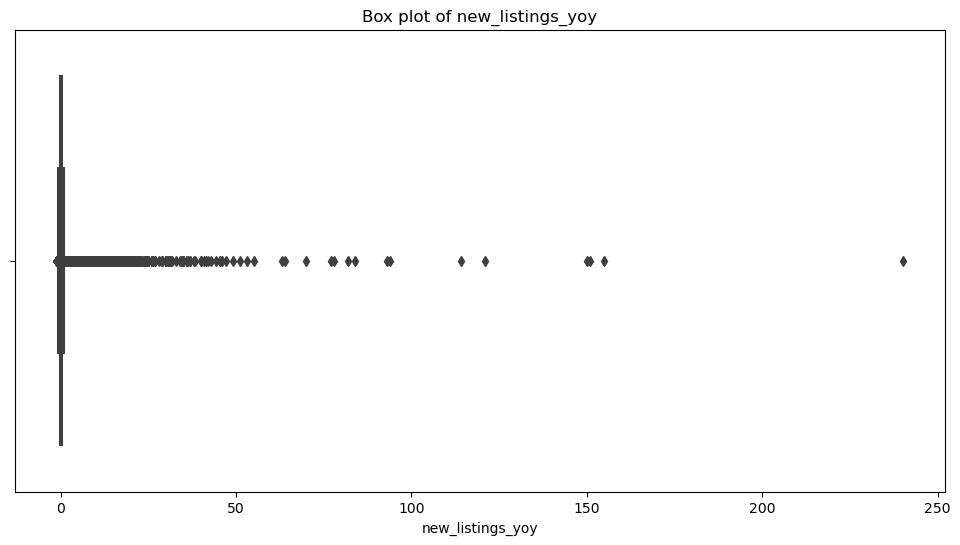

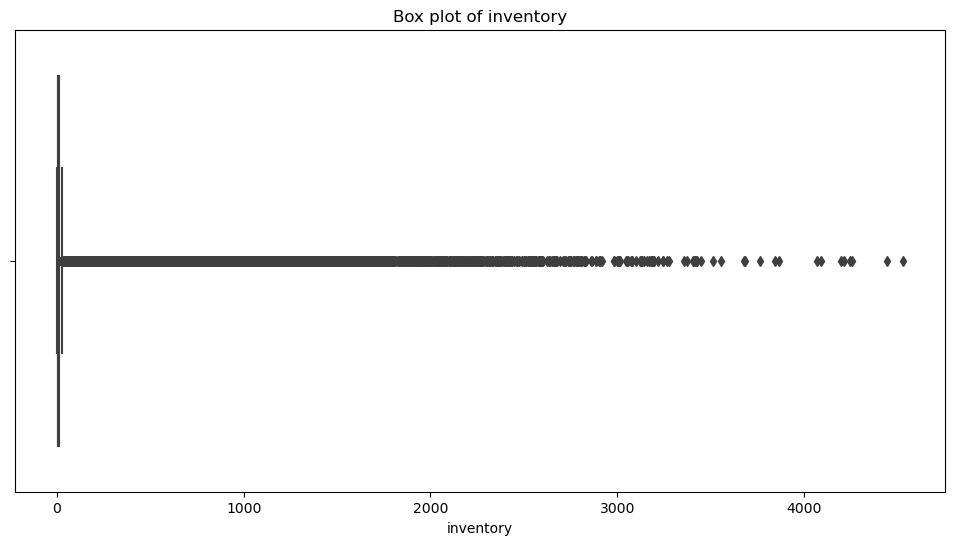

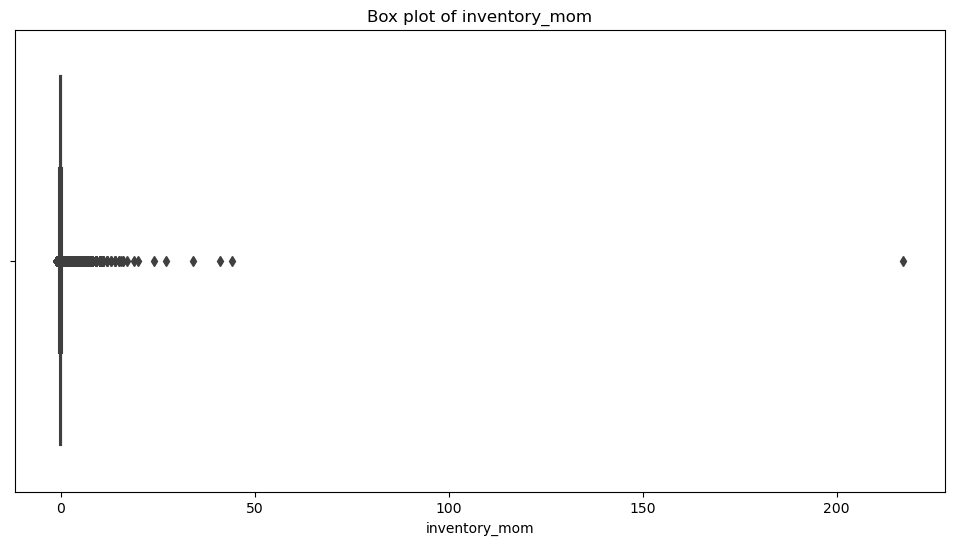

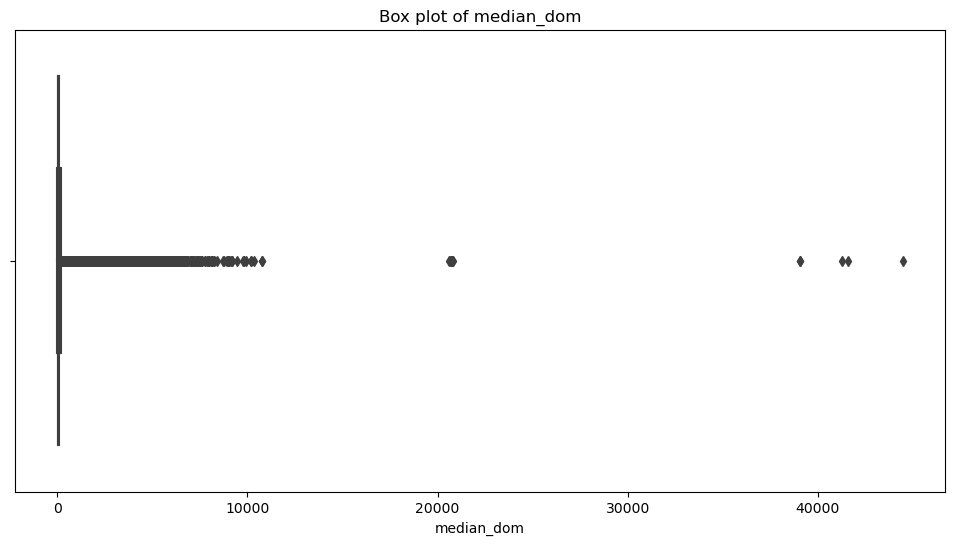

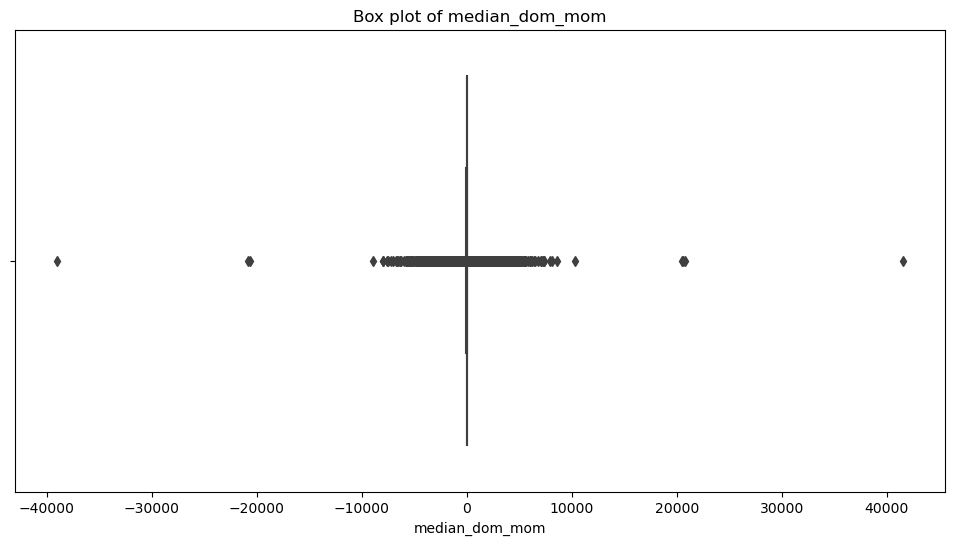

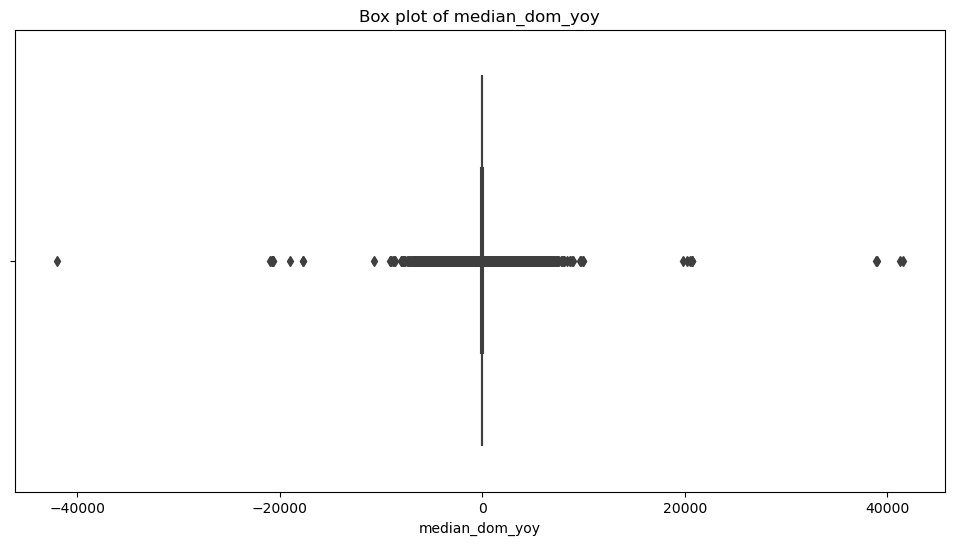

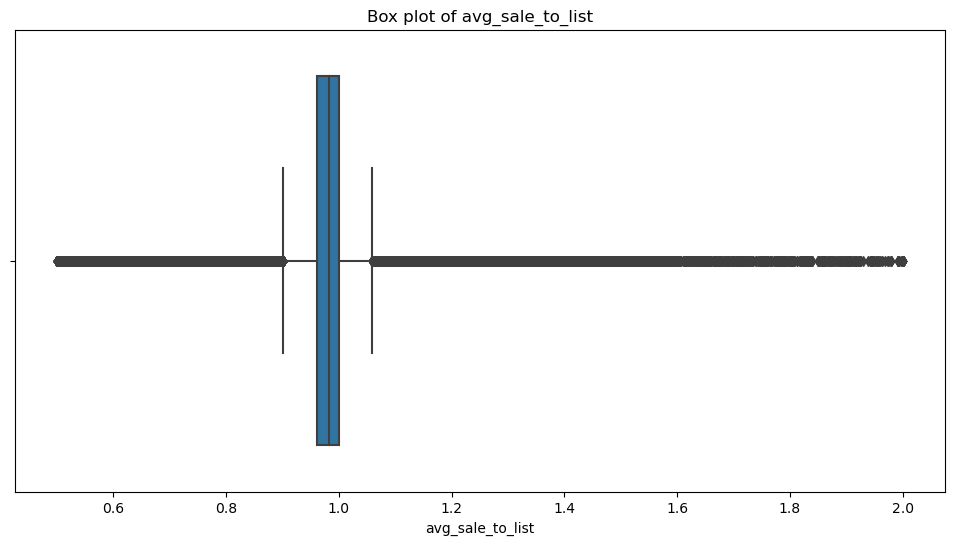

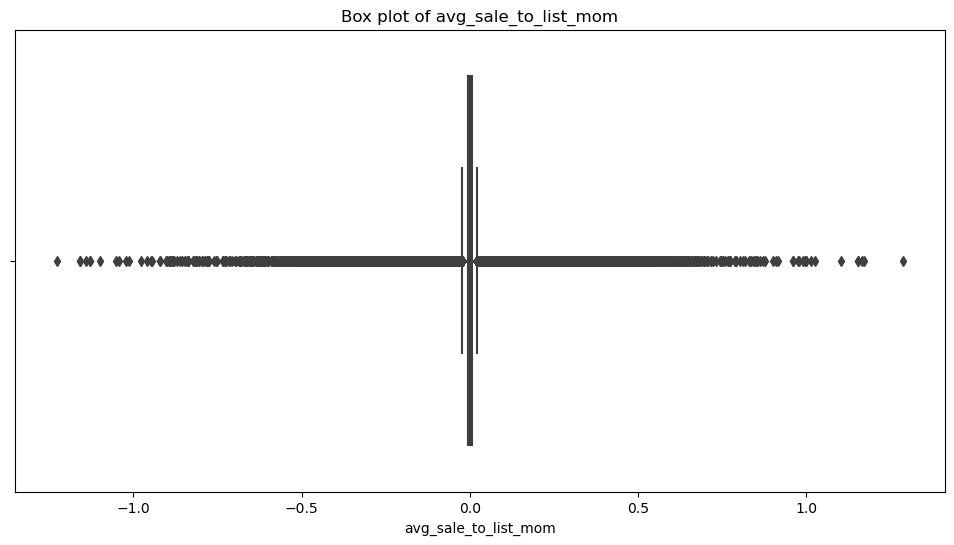

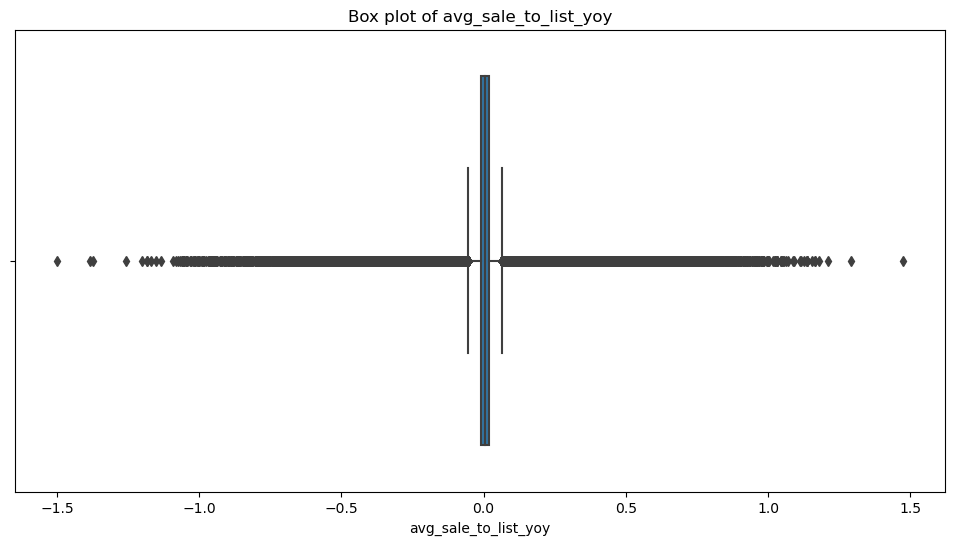

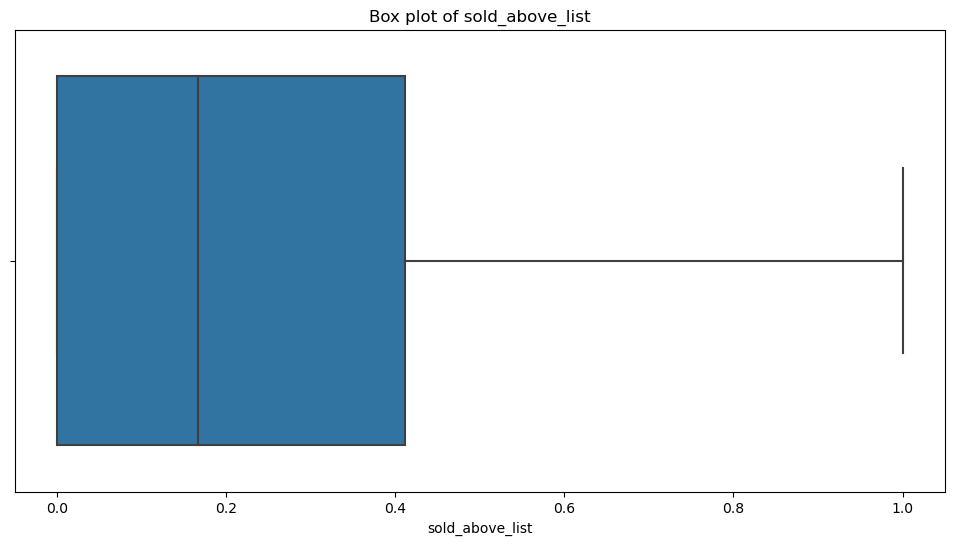

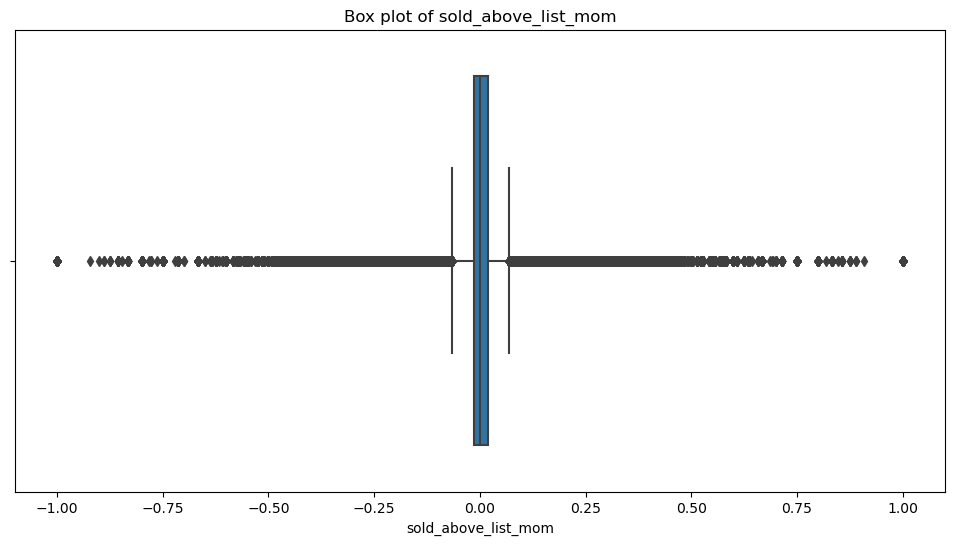

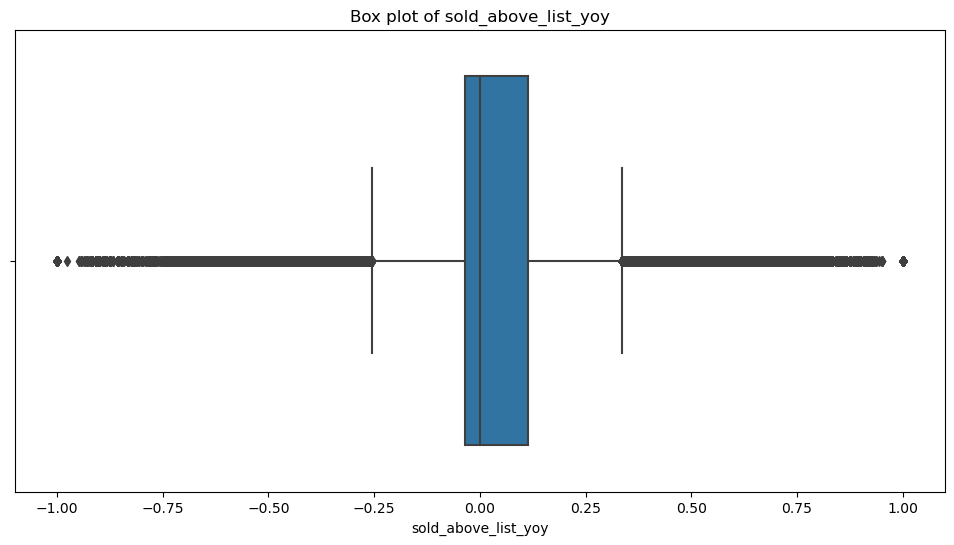

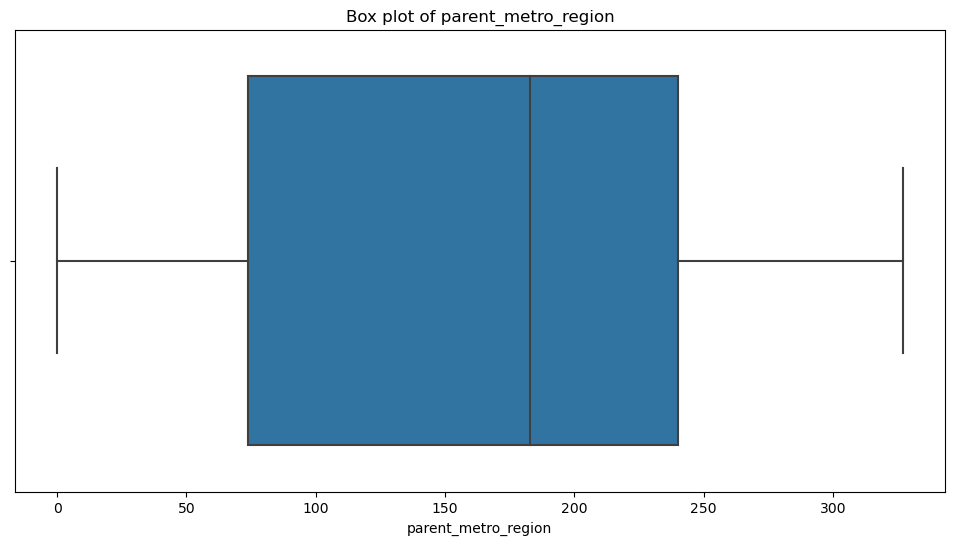

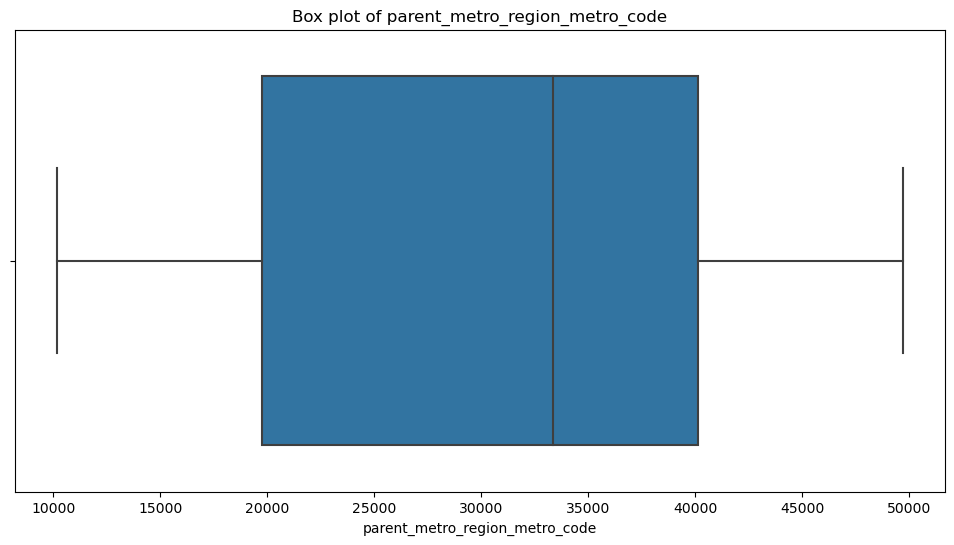

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()


In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the data
df1= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Now 'df1_scaled' is a new DataFrame where all columns of 'df1' have been standardized

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# List of columns to exclude
# exclude_columns = ['region','table_id','parent_metro_region','parent_metro_region_metro_code','avg_sale_to_list','state_code','state']  # replace with your actual column names

# Select features (all columns except 'median_sale_price' and the excluded ones)
features = df1[['period_begin', 'period_end',
                'region', 'city', 'state',
                'property_type', 'median_sale_price_mom', 'median_sale_price_yoy',
                'median_list_price', 'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf',
                'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf', 'median_list_ppsf_mom',
                'median_list_ppsf_yoy', 'homes_sold', 'homes_sold_mom', 'homes_sold_yoy',
                'new_listings', 'new_listings_mom', 'new_listings_yoy', 'inventory',
                'inventory_mom', 'median_dom', 'median_dom_mom', 'median_dom_yoy',
                'avg_sale_to_list', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy',
                'sold_above_list', 'sold_above_list_mom', 'sold_above_list_yoy',
                'parent_metro_region', 'parent_metro_region_metro_code']]

# Select target ('median_sale_price')
target = df1['median_sale_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.1010551438237932
Mean Squared Error (MSE): 0.13754574770410277
Root Mean Squared Error (RMSE): 0.37087160541635267


In [120]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.8572992449759818


In [ ]:
!pip install xgboost

In [122]:
import xgboost as xgb

# Create an XGBoost regression model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 50, alpha = 10, n_estimators = 10)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.2721201385426503
Mean Squared Error (MSE): 0.3948162973710778
Root Mean Squared Error (RMSE): 0.6283440915382891


In [124]:
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.5903865828564645


In [34]:


import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Assuming you have defined X_train, X_test, y_train, y_test

# ARIMA (AutoRegressive Integrated Moving Average)
arima_model = SARIMAX(y_train, order=(1, 1, 1))
arima_fit = arima_model.fit(disp=False)
arima_predictions = arima_fit.get_forecast(steps=len(X_test)).predicted_mean




C:\anacondapython\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anacondapython\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anacondapython\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anacondapython\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [44]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming you have defined X_train, X_test, y_train, y_test
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape input for LSTM (assuming X_train, X_test are 3D arrays)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)
predictions = model.predict(X_test_reshaped)












Epoch 1/10

50000/50000 [==============================] - 486s 10ms/step - loss: 0.3782
Epoch 2/10
50000/50000 [==============================] - 537s 11ms/step - loss: 0.2713
Epoch 3/10
50000/50000 [==============================] - 537s 11ms/step - loss: 0.3017
Epoch 4/10
50000/50000 [==============================] - 550s 11ms/step - loss: 0.2609
Epoch 5/10
50000/50000 [==============================] - 527s 11ms/step - loss: 0.2510
Epoch 6/10
50000/50000 [==============================] - 518s 10ms/step - loss: 0.2434
Epoch 7/10
50000/50000 [==============================] - 511s 10ms/step - loss: 0.2468
Epoch 8/10
50000/50000 [==============================] - 498s 10ms/step - loss: 0.2723
Epoch 9/10
50000/50000 [==============================] - 492s 10ms/step - loss: 0.2456
Epoch 10/10
12500/12500 [==============================] - 71s 6ms/step


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming predictions is the output from your LSTM model
# Reshape predictions to match the original shape
predictions = predictions.reshape(-1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 0.20080485971660106
Root Mean Squared Error (RMSE): 0.4481125525095242
R-squared (R2) Score: 0.7916692767871273
